In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Python and Deep Learning/multiobject_models'

/content/drive/MyDrive/Python and Deep Learning/multiobject_models


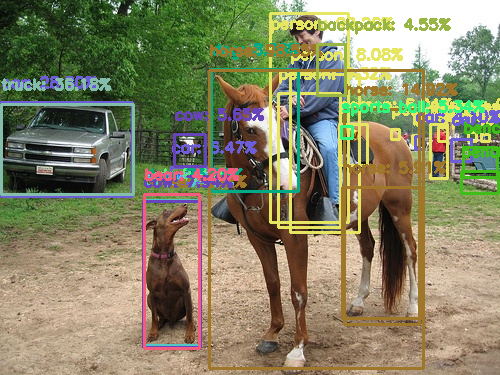

-1

In [47]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
 
# Load a model imported from Tensorflow
tensorflowNet = cv2.dnn.readNetFromTensorflow('inception.pb', 'inception.pbtxt')
 
# Input image
img = cv2.imread('example_05.jpg')
rows, cols, channels = img.shape

confidence_constant = 0.04
 
# Use the given image as input, which needs to be blob(s).
tensorflowNet.setInput(cv2.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))
 
# Runs a forward pass to compute the net output
# Network produces output blob with a shape 1x1xNx7 where N is a number of
# [batchId, classId, confidence, left, top, right, bottom]
networkOutput = tensorflowNet.forward()

classes_90 = ["background", "person", "bicycle", "car", "motorcycle",
            "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
            "unknown", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse",
            "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "unknown", "backpack",
            "umbrella", "unknown", "unknown", "handbag", "tie", "suitcase", "frisbee", "skis",
            "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
            "surfboard", "tennis racket", "bottle", "unknown", "wine glass", "cup", "fork", "knife",
            "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog",
            "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "unknown", "dining table",
            "unknown", "unknown", "toilet", "unknown", "tv", "laptop", "mouse", "remote", "keyboard",
            "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "unknown",
            "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush" ] 


CLASSES = classes_90
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
cvNet = cv2.dnn.readNetFromTensorflow('inception.pb', 'inception.pbtxt')
h = img.shape[0] 
w = img.shape[1] 
cvNet.setInput(cv2.dnn.blobFromImage(img, size=(300, 300), swapRB=True, crop=False))
detections = cvNet.forward()


# loop over the detections
for i in np.arange(0, detections.shape[2]): #detections.shape[2] ==> 100
    # extract the confidence (i.e., probability) associated with
    # the prediction
    confidence = detections[0, 0, i, 2]
    #print(confidence)

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > confidence_constant:
        # extract the index of the class label from the
        # `detections`, then compute the (x, y)-coordinates of
        # the bounding box for the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the prediction on the frame
        label = "{}: {:.2f}%".format(CLASSES[idx],
            confidence * 100)
        cv2.rectangle(img, (startX, startY), (endX, endY),
            COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(img, label, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)



cv2_imshow(img)
cv2.waitKey()

In [14]:
len(detections[0][0][0])

7

In [19]:
type(img)

numpy.ndarray

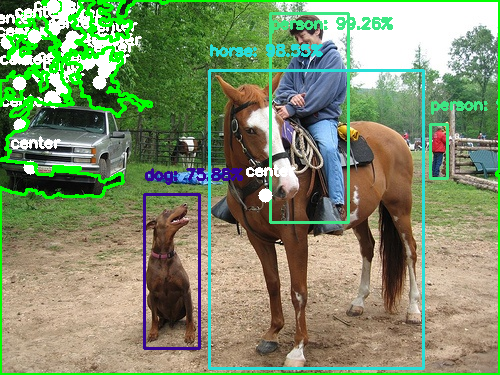

-1

In [35]:
# USAGE
# python center_of_shape.py --image shapes_and_colors.png

# import the necessary packages
import imutils



# load the image, convert it to grayscale, blur it slightly,
# and threshold it
# image = cv2.imread('shapes_and_colors.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
  # compute the center of the contour
  M = cv2.moments(c)
  try:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
  except:
    continue

  # draw the contour and center of the shape on the image
  cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
  cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)
  cv2.putText(img, "center", (cX - 20, cY - 20),
    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# show the image
cv2_imshow(img)
cv2.waitKey(0)

In [22]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

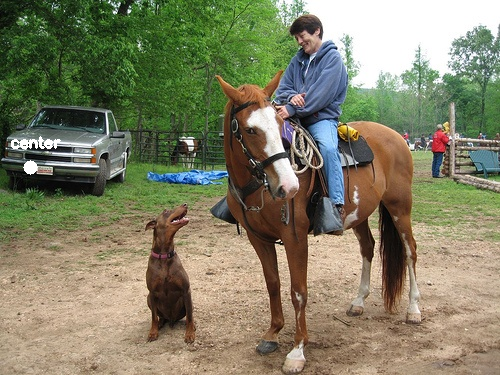

ZeroDivisionError: ignored

In [23]:
# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the contour and center of the shape on the image
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	# show the image
	cv2_imshow(image)
	cv2.waitKey(0)